In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('happiness_score_dataset.csv')
data_2015 = df

In [7]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
list(data_2015.columns)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [9]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
data_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [11]:
data_2015.rename(columns= {'Happiness Score': 'happiness_score'}, inplace=True)
data_2015.rename(columns= {'Happiness Rank': 'happiness_rank'}, inplace=True)

In [12]:
print("Data" ,data_2015.isna().sum().unique())

Data in 2015:  [0]


In [13]:
print("Duplicated values", data_2015.duplicated().sum())

Duplicated values of data in 2015:  0


In [14]:
sns.pairplot(data=data_2015, hue='happiness_rank')

Error in callback <function flush_figures at 0x0000019E46ED9750> (for post_execute):


KeyboardInterrupt: 

C:\Users\jyala\AppData\Local\Temp\ipykernel_17548\1184065608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_2015.corr(), annot=True)


<Axes: >

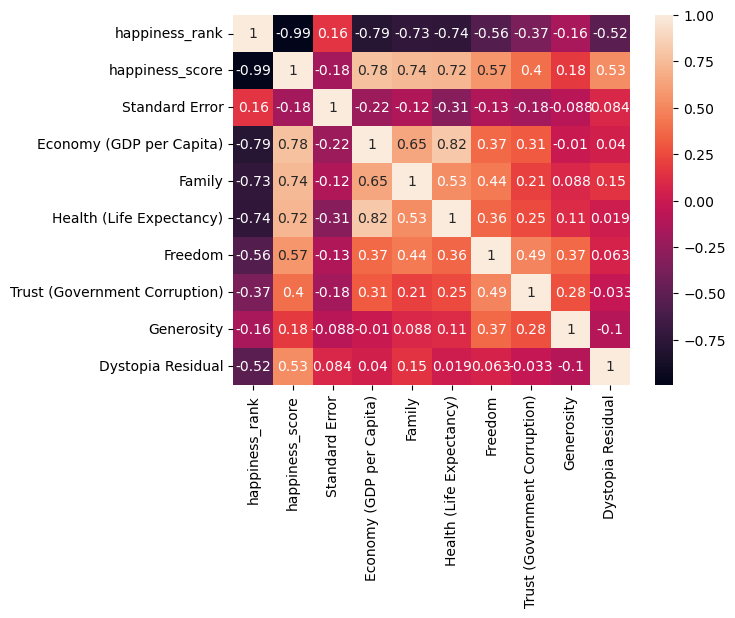

In [15]:
sns.heatmap(data_2015.corr(), annot=True)

Observations:
- As economy increases,health (life expectancy) increases
- Standard error is not necessarily correlated with any feature, so it can be removed
- Economy has a clear impact on family 
- Freedom affects the happiness score 

In [16]:
data_2015.rename(columns={"Standard Error": "standard_err"}, inplace=True)

In [17]:
data_2015.drop(columns="standard_err", inplace=True)

Text(0, 0.5, 'Freedom')

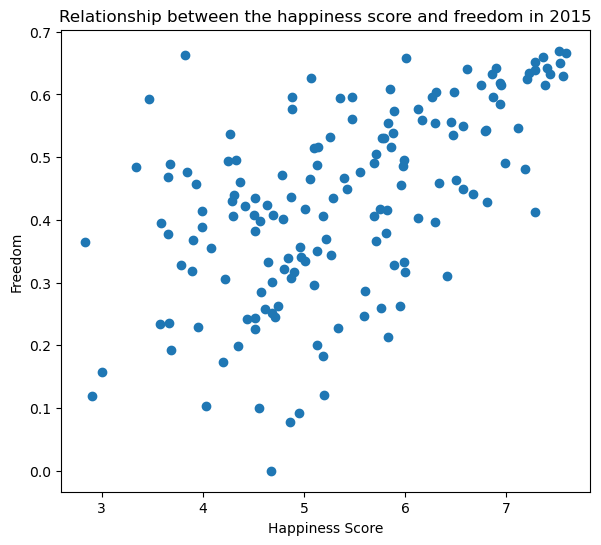

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(data=data_2015, x='happiness_score', y='Freedom', marker='o')
plt.title('Relationship between the happiness score and freedom in 2015')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')

In [19]:
for i in data_2015.Country:
    print("Country:", i, " | Happiness score: ", data_2015["happiness_score"][data_2015.Country == i].sort_values())

Country: Switzerland  | Happiness score:  0    7.587
Name: happiness_score, dtype: float64
Country: Iceland  | Happiness score:  1    7.561
Name: happiness_score, dtype: float64
Country: Denmark  | Happiness score:  2    7.527
Name: happiness_score, dtype: float64
Country: Norway  | Happiness score:  3    7.522
Name: happiness_score, dtype: float64
Country: Canada  | Happiness score:  4    7.427
Name: happiness_score, dtype: float64
Country: Finland  | Happiness score:  5    7.406
Name: happiness_score, dtype: float64
Country: Netherlands  | Happiness score:  6    7.378
Name: happiness_score, dtype: float64
Country: Sweden  | Happiness score:  7    7.364
Name: happiness_score, dtype: float64
Country: New Zealand  | Happiness score:  8    7.286
Name: happiness_score, dtype: float64
Country: Australia  | Happiness score:  9    7.284
Name: happiness_score, dtype: float64
Country: Israel  | Happiness score:  10    7.278
Name: happiness_score, dtype: float64
Country: Costa Rica  | Happiness

In [20]:
data_2015["Country"] = data_2015["Country"].astype('category').cat.codes.to_numpy()
data_2015["Region"] = data_2015["Region"].astype('category').cat.codes.to_numpy()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor

def linear(data, random_state=42):
    x = data.drop(columns="happiness_score")
    y = data["happiness_score"]
    model = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=random_state)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f"MSE for linear regression model: {mse(y_test, pred)}")



def knn(data, n_neighbors=5, leaf_size=30, metric='minkowski', n_jobs=-1):

    x = data.drop(columns="happiness_score")
    y = data["happiness_score"]

    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

    model = KNeighborsRegressor(n_neighbors=n_neighbors, leaf_size=leaf_size, metric=metric, n_jobs=n_jobs)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print("MSE for KNN : ", mse(y_test,pred))


def gradient_boosting(data, lr=0.1, max_depth=3, estimators=100, random_state=42):
    x = data.drop(columns="happiness_score")
    y = data["happiness_score"]

    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=random_state)

    model = GradientBoostingRegressor(learning_rate=lr, n_estimators=estimators,max_depth=max_depth, random_state=random_state)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print("MSE for Gradient Boosting Regressor: ", mse(y_test, pred))

In [67]:
linear(data_2015)

MSE for linear regression model: 6.994513208483984e-08


In [68]:
for i in [3,5,20,50,100]:
    knn(data_2015, n_neighbors=i)

MSE for KNN :  0.0461178611111111
MSE for KNN :  0.053396854999999986
MSE for KNN :  0.14118466818749997
MSE for KNN :  0.39464627096000016
MSE for KNN :  0.9754876183874999


It seems that setting n_neighbors to 3 gives the best accuracy. Let's now test for the leaf size

In [69]:
for i in[10,30,60,100,200]:
    knn(data_2015, n_neighbors=3, leaf_size=i)
    pass

MSE for KNN :  0.0461178611111111
MSE for KNN :  0.0461178611111111
MSE for KNN :  0.0461178611111111
MSE for KNN :  0.0461178611111111
MSE for KNN :  0.0461178611111111


Well, it did not affect anything.

When applying the same steps foor Gradient Boosting Regressor, it gave the best accuracy with the learning rate of 0.1, max depth of 3 and n_estimators of 100

Let's use them!


In [70]:
gradient_boosting(data=data_2015, lr=0.1, max_depth=3, estimators=100)

MSE for Gradient Boosting Regressor:  0.002283909293667375
